# Blue Book for Bulldozers

This project is a milestone project of [Complete Machine Learning & Data Science Bootcamp](https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/) inspired by the Kaggle project [Blue Book for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

The target of the prject is to *Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.*

The learning purpose of the project is to building regression models with time series data, as well as learning more ways of data cleaning and feature engineering.

## Defining the Problem

The objective of this project is to answer the following question:

> Given a bulldozer's features and characteristics, can we predict the price at which it will sell in the future, based on previous sales data of similar bulldozers?

## Data

The dataset, available for download from[Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), is a time-series data, meaning it consists of historical data ordered by time. Specifically, it is historical sales data of bulldozers, including various attributes such as model type, size, sale date, and more.

The dataset is divided into three parts:

1. Train.csv - Historical bulldozer sales data up to 2011 (approximately 400,000 instances with over 50 different attributes, including SalePrice which is our target variable).
2. Valid.csv - Historical bulldozer sales data from January 1, 2012, to April 30, 2012 (around 12,000 instances with the same attributes as Train.csv).
3. Test.csv - Historical bulldozer sales data from May 1, 2012, to November 2012 (approximately 12,000 instances but without the SalePrice attribute, since that's what we aim to predict).

## Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

As with many regression metrics, the aim is to minimize this value. We will calculate the RMSLE to gauge the performance of our model, and compare our results with others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

## 4. Features


For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can [download this file directly from the Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (account required) or view it on Google Sheets.


### Importing the data and preparing it for modelling

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Import Machine learning tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [3]:
# show data dictionary:
xl = pd.ExcelFile("bluebook-for-bulldozers/Data Dictionary.xlsx")
dictionary = xl.parse(0)

/home/lance/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
dictionary = dictionary.drop("Unnamed: 2", axis=1)

In [5]:
dictionary

Variable  \
0                    SalesID   
1                  MachineID   
2                    ModelID   
3                 datasource   
4               auctioneerID   
5                   YearMade   
6   MachineHoursCurrentMeter   
7                  UsageBand   
8                   Saledate   
9                  Saleprice   
10               fiModelDesc   
11               fiBaseModel   
12           fiSecondaryDesc   
13             fiModelSeries   
14         fiModelDescriptor   
15               ProductSize   
16          ProductClassDesc   
17                     State   
18              ProductGroup   
19          ProductGroupDesc   
20              Drive_System   
21                 Enclosure   
22                     Forks   
23                  Pad_Type   
24              Ride_Control   
25                     Stick   
26              Transmission   
27              Turbocharged   
28           Blade_Extension   
29               Blade_Width   
30            Enclosure_Type   
31         Engine_Horsepower   
32                Hydraulics   
33                 Pushblock   
34                    Ripper   
35                 Scarifier   
36               Tip_control   
37                 Tire_Size   
38                   Coupler   
39            Coupler_System   
40            Grouser_Tracks   
41           Hydraulics_Flow   
42                Track_Type   
43   Undercarriage_Pad_Width   
44              Stick_Length   
45                     Thumb   
46           Pattern_Changer   
47              Grouser_Type   
48          Backhoe_Mounting   
49                Blade_Type   
50           Travel_Controls   
51         Differential_Type   
52         Steering_Controls   

                                          Description  
0     unique identifier of a particular sale of a ...  
1     identifier for a particular machine;  machin...  
2     identifier for a unique machine model (i.e. ...  
3     source of the sale record;  some sources are...  
4     identifier of a particular auctioneer, i.e. ...  
5                 year of manufacturer of the Machine  
6     current usage of the machine in hours at tim...  
7     value (low, medium, high) calculated compari...  
8                                        time of sale  
9                                 cost of sale in USD  
10    Description of a unique machine model (see M...  
11                      disaggregation of fiModelDesc  
12                      disaggregation of fiModelDesc  
13                      disaggregation of fiModelDesc  
14                      disaggregation of fiModelDesc  
15                           Don't know what this is   
16    description of 2nd level hierarchical groupi...  
17                    US State in which sale occurred  
18    identifier for top-level hierarchical groupi...  
19    description of top-level hierarchical groupi...  
20  machine configuration;  typcially describes wh...  
21  machine configuration - does machine have an e...  
22  machine configuration - attachment used for li...  
23  machine configuration - type of treads a crawl...  
24  machine configuration - optional feature on lo...  
25           machine configuration - type of control   
26  machine configuration - describes type of tran...  
27  machine configuration - engine naturally aspir...  
28  machine configuration - extension of standard ...  
29             machine configuration - width of blade  
30  machine configuration - does machine have an e...  
31   machine configuration - engine horsepower rating  
32         machine configuration - type of hydraulics  
33                     machine configuration - option  
34  machine configuration - implement attached to ...  
35  machine configuration - implement attached to ...  
36      machine configuration - type of blade control  
37      machine configuration - size of primary tires  
38  machine configuration - type of implement inte...  
39  machine configuration - type of implement inte.

## Basic data exploration

In [6]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

## Visualize target(sale price) along time series

<Axes: xlabel='saledate', ylabel='SalePrice'>

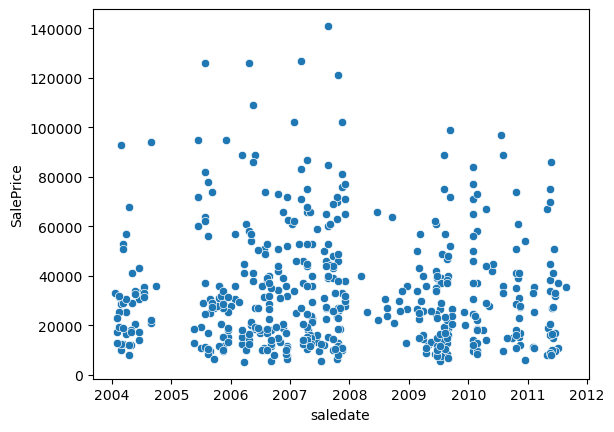

In [8]:
## Visualize target(sale price) along time series
sns.scatterplot(data=df.head(500), x="saledate", y ="SalePrice")

<Axes: xlabel='saledate', ylabel='SalePrice'>

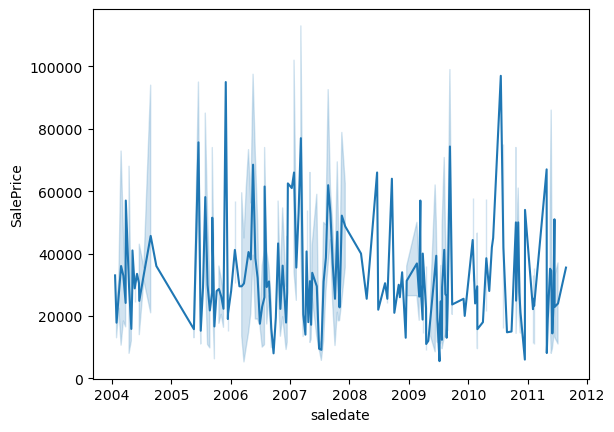

In [9]:
sns.lineplot(data=df.head(500), x="saledate", y ="SalePrice")

## Have a look at all columns

In [10]:
df.head(5).T

0  \
SalesID                                                    1139246   
SalePrice                                                  66000.0   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                   3.0   
YearMade                                                      2004   
MachineHoursCurrentMeter                                      68.0   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                  57000.0   
MachineID                                                   117657   
Mode

## Sort the dataframe ascendingly by  datetime

In [11]:
df.sort_values(by=["saledate"], ascending=True, inplace=True)

In [12]:
df.saledate.head(15)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [13]:
df.saledate.tail(15)

406092   2012-04-28
409780   2012-04-28
406167   2012-04-28
411334   2012-04-28
412164   2012-04-28
409202   2012-04-28
408976   2012-04-28
411695   2012-04-28
411319   2012-04-28
408889   2012-04-28
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, dtype: datetime64[ns]

## Data cleaning and feature engineering

In [14]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

### Datetime engineering

in order for the datatime data to be used for machine learning model, we should first change it to numeric values that make sense to ML models.

In [15]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [16]:
# sanity check
df_tmp.head().T.iloc[-5:]

205615 274835 141296 212552 62755 
saleYear        1989   1989   1989   1989   1989
saleMonth          1      1      1      1      1
saleDay           17     31     31     31     31
saleDayOfWeek      1      1      1      1      1
saleDayOfYear     17     31     31     31     31

In [17]:
df_tmp.drop(columns=["saledate"], inplace=True)

## Turn string to numeric

While one could opt to convert string data into a numerical format using one-hot encoding, doing so in our case would significantly increase the number of features, given that we already have dozens of string features. As such, to streamline our processing and manage computational resources effectively, we have decided to employ pandas' category data type for handling string features in this exercise. 

This strategy efficiently transforms the categorical string data into an internal numeric representation, thereby maintaining a manageable feature space without sacrificing the interpretability of our model.

In [18]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [19]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [20]:
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

## Filling Missing Data

In [21]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

<Axes: >

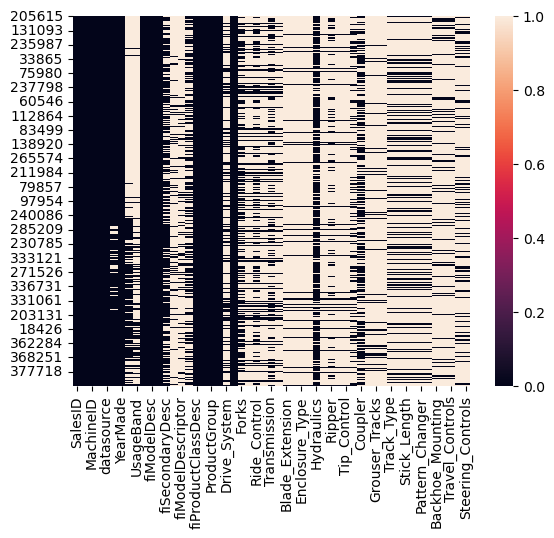

In [22]:
sns.heatmap(df.isna())

## Fill Numeric Data

In [23]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            df_tmp[label+'_is_missing'] = content.isnull()
            content.fillna(value=content.median(), inplace=True)

## Fill Catagorical Data and turn to numeric

In [24]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+'_is_missing'] = content.isnull()
        df_tmp[label] = pd.Categorical(content).codes + 1 
        # We add the +1 because pandas encodes missing categories as -1

In [26]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

<Axes: >

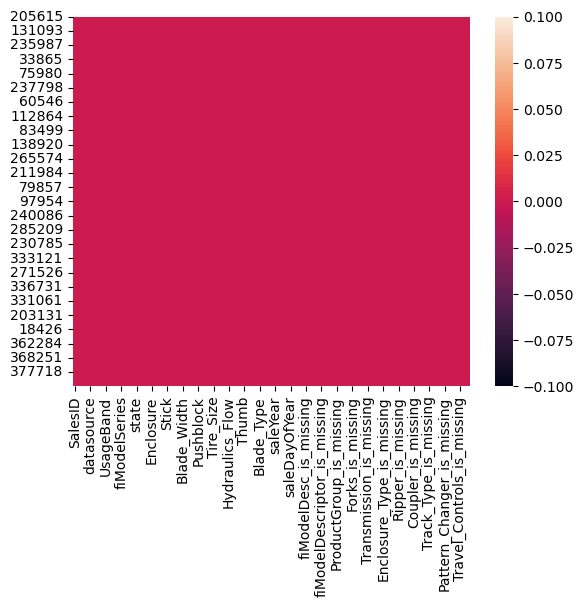

In [25]:
sns.heatmap(df_tmp.isna())

## Information leakage risk

In the preceding steps, while filling missing numerical data, we relied on the mean of the entire dataframe, a process that inherently risks the leakage of information from our potential test set. In this specific scenario, the issue is not substantial, considering we only filled a single numerical feature with missing data, and the chosen fill value was zero. Nevertheless, it's crucial to acknowledge this risk. In scenarios where the distribution of data is significant, such an approach could inadvertently bias our model, leading to overly optimistic or skewed performance metrics. Therefore, it's generally advisable to handle missing data in a way that respects the separation of training and test datasets, preserving the integrity of validation procedures.

# Buiding Machine Learning Model

For tebular data, except Xgboost, Random Froest usually have a better performance. In this practice, we will choose the Random Forest Regressor to train our regression model.

## Building an evaluation function

As the Kaggle project stated, we need a squared error metric for testing the performance of the model

In [32]:
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and test data
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [33]:
# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [27]:
df_tmp.shape

(412698, 103)

## Split X_train, y_train, X_valid, y_valid

In [34]:
# count years for test-validation split
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [35]:
df_train = df_tmp[df_tmp.saleYear != 2012]
df_valid = df_tmp[df_tmp.saleYear == 2012]

In [36]:
df_train.shape, df_valid.shape

((401125, 103), (11573, 103))

In [37]:
X_train, y_train = df_train.drop(columns="SalePrice"), df_train.SalePrice
X_valid, y_valid = df_valid.drop(columns="SalePrice"), df_valid.SalePrice

In [38]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Hyperparameter tuning with RandomizedSearchCV

"While the use of GridSearchCV for hyperparameter tuning can yield precise results, it can also be time-consuming especially for large datasets or complex models. Hence, in the interest of learning efficiency and time management, I will leverage RandomizedSearchCV. It provides a quicker and more practical approach for our purposes, randomly selecting combinations of hyperparameters for evaluation.

In [54]:
rf_grid = {"n_estimators": np.arange(10, 100, 20),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [1.0],
           "max_samples": [10000]}

In [57]:
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=101),param_distributions=rf_grid, n_iter=40, cv=5)

In [58]:
rs_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=101),
                   n_iter=40,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [1.0],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 30, 50, 70, 90])})

In [64]:
# find the best best params
best_hyper = rs_model.best_params_
del best_hyper["max_samples"]
best_hyper

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 1.0,
 'max_depth': None}

In [65]:
show_scores(rs_model)

{'Training MAE': 5601.631002902551,
 'Valid MAE': 7240.5471693144555,
 'Training RMSLE': 0.25879329105611204,
 'Valid RMSLE': 0.2952178657870315,
 'Training R^2': 0.8581312467088378,
 'Valid R^2': 0.8296047136554054}

## Train a model with the best hyperparameters we found and the whole dataset

In [66]:
model = RandomForestRegressor(**best_hyper, n_jobs=-1, random_state=101)
model.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=70, n_jobs=-1,
                      random_state=101)

# Testing model

## Preprocessing test data

In [81]:
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", low_memory=False,parse_dates=["saledate"])

In [82]:
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                    3688.0       Low 2012-05-03        580G  ...   
1                   28555.0      High 2012-05-10         936  ...   
2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
3                    8940.0      High 2012-05-10       330CL  ...   
4                    2286.0       Low 2012-05-10        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

## Preprocessing the test data in the same way

In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [84]:
def preprocess_data(df_tmp):
    """
    Performs transormations on df and return transformed df
    """
    # processing datetime data
    df_tmp["saleYear"] = df_tmp.saledate.dt.year
    df_tmp["saleMonth"] = df_tmp.saledate.dt.month
    df_tmp["saleDay"] = df_tmp.saledate.dt.day
    df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
    df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year
    df_tmp.drop(columns=["saledate"], inplace=True)
    
    # processing category data
    for label, content in df_tmp.items():
        if pd.api.types.is_object_dtype(content):
            df_tmp[label] = content.astype("category").cat.as_ordered()
            
    # processing numeric data
    for label, content in df_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isnull().sum():
                df_tmp[label+'_is_missing'] = content.isnull()
                content.fillna(value=content.median(), inplace=True)
                
    # processing category data
    for label, content in df_tmp.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_tmp[label+'_is_missing'] = content.isnull()
            df_tmp[label] = pd.Categorical(content).codes + 1 
            # We add the +1 because pandas encodes missing categories as -1
    
    return df_tmp

In [85]:
df_test = preprocess_data(df_test)

In [86]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [88]:
list(X_train.columns).index('auctioneerID_is_missing')

56

In [89]:
df_test.insert(56, 'auctioneerID_is_missing', False)

## Test data

In [90]:
test_preds = model.predict(df_test)

## Format to the kaggle format

In [92]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test.SalesID
df_preds["SalesPrice"] = test_preds

In [93]:
df_preds

SalesID    SalesPrice
0      1227829  21873.897392
1      1227844  18395.833333
2      1227847  47489.234694
3      1227848  84395.113379
4      1227863  53175.991497
...        ...           ...
12452  6643171  48441.964286
12453  6643173  10682.321429
12454  6643184  12398.407029
12455  6643186  17655.867347
12456  6643196  31077.083333

[12457 rows x 2 columns]

## Feature Importance

Figure out which features are important when it comes to prediction

In [94]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

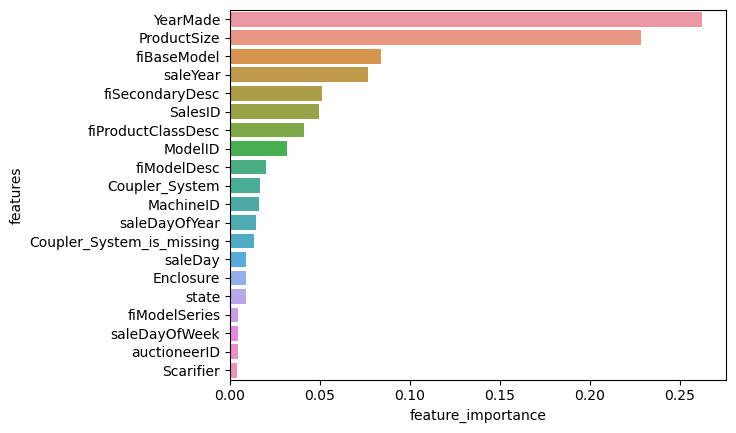

In [95]:
plot_features(X_train.columns, model.feature_importances_)